**классификатор изображений MPL**

Евгений Борисов borisov.e@solarl.ru

## Библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import utils 

In [3]:
np.random.seed(1671)

## Данные

In [4]:
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-images-idx3-ubyte.gz
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-labels-idx1-ubyte.gz
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/t10k-labels-idx1-ubyte.gz
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/t10k-images-idx3-ubyte.gz

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

---

In [7]:
NB_CLASSES = len(set(train_labels))
NB_CLASSES

10

In [8]:
# normalize 
X_train = train_images/255.0
X_test = test_images/255.0

RESHAPED = 784

# X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
X_train = X_train.reshape(60000, RESHAPED).astype('float32')
X_test = X_test.reshape(10000, RESHAPED).astype('float32')

In [9]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [10]:
# convert class vectors to binary class matrices
Y_train = utils.to_categorical(train_labels, NB_CLASSES)
Y_test = utils.to_categorical(test_labels, NB_CLASSES)

In [11]:
# Y_train
# y_train

## Модель

In [12]:
N_HIDDEN = 128
DROPOUT = 0.7

In [13]:
# model = Sequential()
# model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
# model.add(Activation('softmax'))

In [14]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(rate=DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(rate=DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
__________

---

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

## Обучение

In [17]:
# network and training
NB_EPOCH = 100
BATCH_SIZE = 128
VERBOSE = 1
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

In [18]:
%%time 

history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, 
                    epochs=NB_EPOCH,
                    verbose=VERBOSE, 
                    validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
48000/48000 [==============================] - 1s 26us/sample - loss: 2.0835 - acc: 0.2381 - val_loss: 1.5130 - val_acc: 0.6480
Epoch 2/100
48000/48000 [==============================] - 1s 23us/sample - loss: 1.6273 - acc: 0.4041 - val_loss: 1.0815 - val_acc: 0.7109
Epoch 3/100
48000/48000 [==============================] - 1s 24us/sample - loss: 1.3790 - acc: 0.4885 - val_loss: 0.8969 - val_acc: 0.7337
Epoch 4/100
48000/48000 [==============================] - 1s 23us/sample - loss: 1.2225 - acc: 0.5477 - val_loss: 0.8028 - val_acc: 0.7494
Epoch 5/100
48000/48000 [==============================] - 1s 24us/sample - loss: 1.1290 - acc: 0.5792 - val_loss: 0.7484 - val_acc: 0.7563
Epoch 6/100
48000/48000 [==============================] - 1s 23us/sample - loss: 1.0646 - acc: 0.6032 - val_loss: 0.7123 - val_acc: 0.7620
Epoch 7/100
48000/48000 [==============================] - 1s 

48000/48000 [==============================] - 1s 22us/sample - loss: 0.5959 - acc: 0.7947 - val_loss: 0.4384 - val_acc: 0.8482
Epoch 58/100
48000/48000 [==============================] - 1s 21us/sample - loss: 0.5957 - acc: 0.7971 - val_loss: 0.4371 - val_acc: 0.8499
Epoch 59/100
48000/48000 [==============================] - 1s 21us/sample - loss: 0.5995 - acc: 0.7929 - val_loss: 0.4396 - val_acc: 0.8482
Epoch 60/100
48000/48000 [==============================] - 1s 21us/sample - loss: 0.5962 - acc: 0.7965 - val_loss: 0.4349 - val_acc: 0.8500
Epoch 61/100
48000/48000 [==============================] - 1s 21us/sample - loss: 0.5892 - acc: 0.7971 - val_loss: 0.4320 - val_acc: 0.8481
Epoch 62/100
48000/48000 [==============================] - 1s 21us/sample - loss: 0.5945 - acc: 0.7958 - val_loss: 0.4325 - val_acc: 0.8491
Epoch 63/100
48000/48000 [==============================] - 1s 21us/sample - loss: 0.5887 - acc: 0.7971 - val_loss: 0.4312 - val_acc: 0.8481
Epoch 64/100
48000/48000 [

## Тестирование

In [19]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)

print("\nTest score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 36us/sample - loss: 0.4308 - acc: 0.8470

Test score: 0.4308198677778244
Test accuracy: 0.847


---

In [20]:
# import matplotlib.pyplot as plt

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

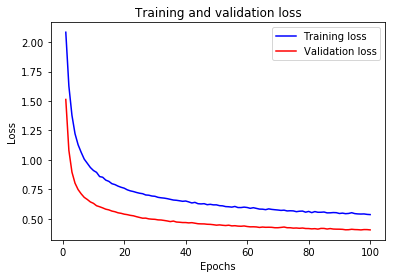

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

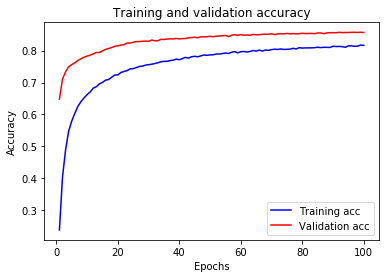

In [23]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

---

In [24]:
# class_names = [ 'T-shirt/top', 
#                 'Trouser', 
#                 'Pullover', 
#                 'Dress', 
#                 'Coat', 
#                 'Sandal', 
#                 'Shirt', 
#                 'Sneaker', 
#                 'Bag', 
#                 'Ankle boot' ]

In [25]:
class_names = [ 'футболка', 
                'брюки', 
                'свитер', 
                'платье', 
                'пальто', 
                'сандали', 
                'рубашка', 
                'тапки', 
                'сумка', 
                'полусапожки' ]

---

In [26]:
p = model.predict(X_test)
r = np.argmax(p,axis=1)
n = test_images.shape[1]

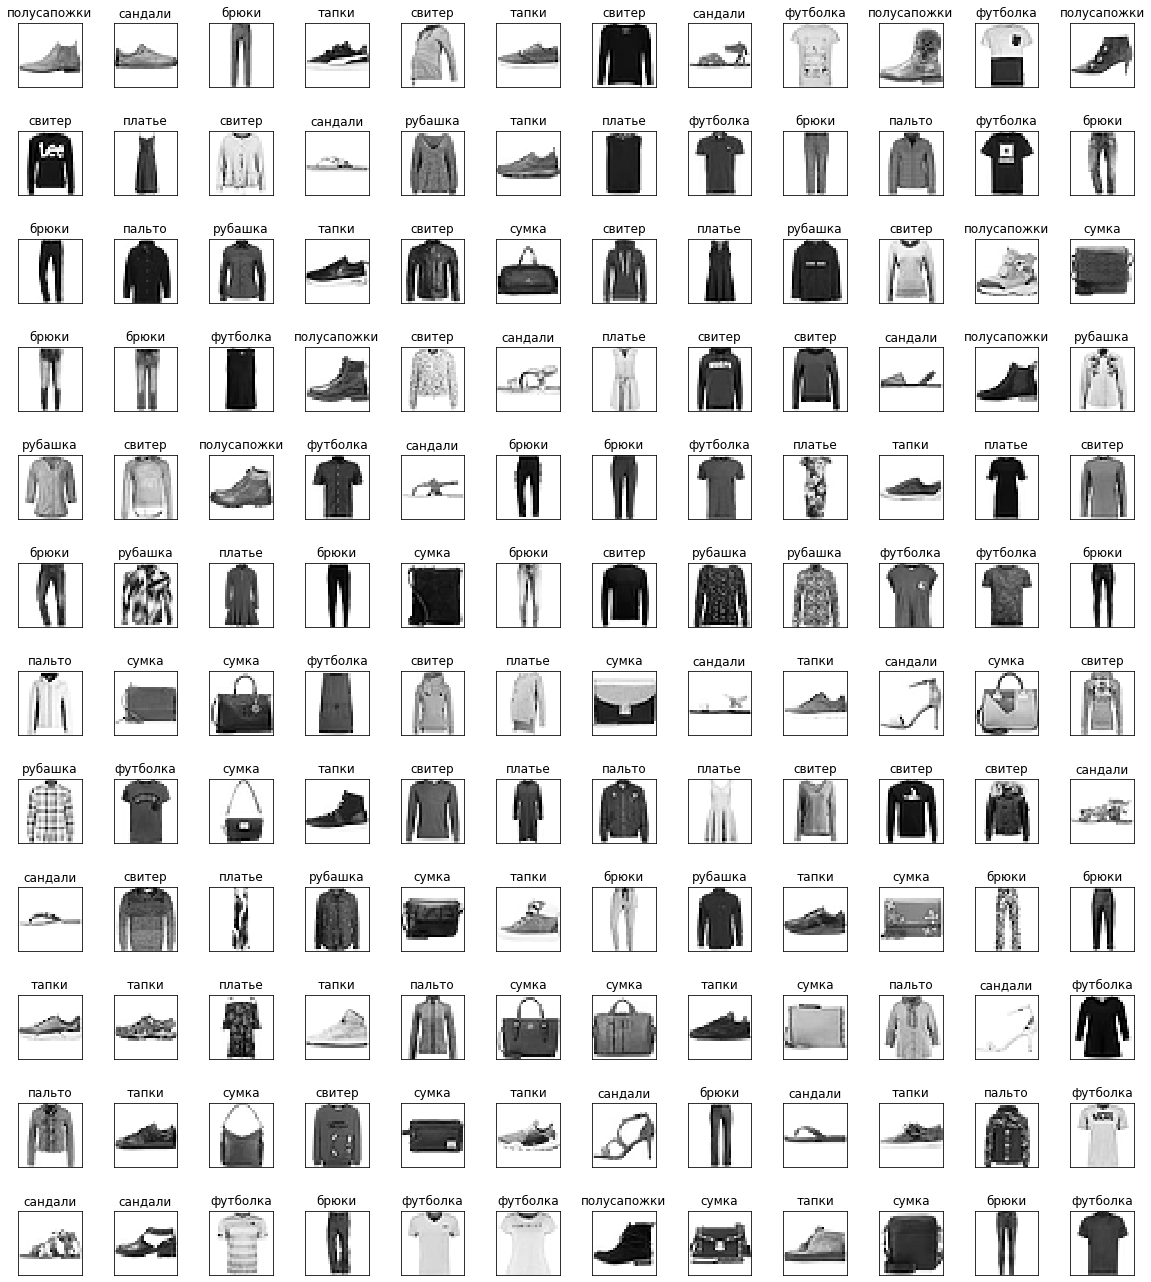

In [27]:
m=12

f, axarr = plt.subplots( m, m, figsize=(20,20))

k=0
for j in range(m):
    for i in range(m):
        k=m*j+i 
        axarr[i][j].set_title(class_names[r[k]])
        axarr[i][j].axes.get_xaxis().set_visible(False)
        axarr[i][j].axes.get_yaxis().set_visible(False)
        # axarr[i][j].imshow(test_images[k,:,:],cmap=plt.cm.plasma)
        axarr[i][j].imshow(test_images[k,:,:],cmap=plt.cm.Greys)
                        
# plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)
plt.subplots_adjust( top=1.0, hspace=0.5, wspace=0.5)
plt.show()

---

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.client import device_lib

In [29]:
print('tensorflow:', tf.__version__)
print('keras:', keras.__version__)

if tf.test.is_built_with_cuda():
    print('GPU devices:\n  ',
        [ [x.name, x.physical_device_desc] 
          for x in device_lib.list_local_devices() 
          if x.device_type == 'GPU' ]
    )
    print('default GPU device:', tf.test.gpu_device_name() )

else:
    print('no GPU device found')
    

tensorflow: 1.13.1
keras: 2.2.4-tf
GPU devices:
   [['/device:GPU:0', 'device: 0, name: GeForce GT 730, pci bus id: 0000:01:00.0, compute capability: 3.5']]
default GPU device: /device:GPU:0
